In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('maryland_accident_dataset.csv')

In [3]:
# data type check
data.dtypes

CDL_FLAG                   object
CONDITION_CODE             object
EQUIP_PROB_CODE            object
FAULT_FLAG                 object
INJ_SEVER_CODE             object
PERSON_ID                  object
PERSON_TYPE                object
REPORT_NO                  object
SAF_EQUIP_CODE             object
SEX_CODE                   object
VEHICLE_ID                 object
COLLISION_TYPE_CODE        object
C_M_ZONE_FLAG              object
JUNCTION_CODE              object
LANE_CODE                  object
LIGHT_CODE                 object
RD_COND_CODE               object
RD_DIV_CODE                object
SURF_COND_CODE             object
WEATHER_CODE               object
AREA_DAMAGED_CODE_MAIN     object
BODY_TYPE_CODE             object
DAMAGE_CODE                object
HIT_AND_RUN_FLAG           object
MOVEMENT_CODE              object
TIME                       object
AGE                       float64
dtype: object

In [4]:
data

,CDL_FLAG,CONDITION_CODE,EQUIP_PROB_CODE,FAULT_FLAG,INJ_SEVER_CODE,PERSON_ID,PERSON_TYPE,REPORT_NO,SAF_EQUIP_CODE,SEX_CODE,...,RD_DIV_CODE,SURF_COND_CODE,WEATHER_CODE,AREA_DAMAGED_CODE_MAIN,BODY_TYPE_CODE,DAMAGE_CODE,HIT_AND_RUN_FLAG,MOVEMENT_CODE,TIME,AGE
0,N,Apparently Normal,No Misuse,N,No Injury,a33f1d87-624c-4608-a11e-84d03ecd067a,D,AB36760008,Shoulder/Lap Belt(s),M,...,"Two-way, Not Divided",Wet,Raining,Six o'clock,Passenger Car,Functional,Y,Starting From Parked,2015-01-24 01:40:00,42.0
1,N,Apparently Normal,No Misuse,N,No Injury,a6c44772-fd8f-47d5-95ba-25c143766037,D,AC1022000M,Shoulder/Lap Belt(s),M,...,"Two-way, Not Divided",Dry,Clear,Six o'clock,(Sport) Utility Vehicle,Superficial,N,Moving Constant Speed,2015-03-30 16:19:00,53.0
2,N,Apparently Normal,No Misuse,N,No Injury,517a3a6f-3d0d-4cda-8e42-836efaf5f55d,D,AC2017000W,Shoulder/Lap Belt(s),F,...,"Two-way, Not Divided",Wet,Raining,Six o'clock,Passenger Car,Disabling,N,Stopped in Traffic Lane,2015-03-26 11:13:00,44.0
3,N,Apparently Normal,No Misuse,N,Possible Incapacitating Injury,9dfe84cd-9dce-4aeb-9618-e11af38d88e1,D,AC2017000W,Shoulder/Lap Belt(s),F,...,"Two-way, Not Divided",Wet,Raining,Six o'clock,Passenger Car,Disabling,N,Stopped in Traffic Lane,2015-03-26 11:13:00,48.0
4,N,Apparently Normal,No Misuse,Y,No Injury,72c93d16-1bd8-4503-8cbf-3f8fb40d19e3,D,ADF451000C,Shoulder/Lap Belt(s),F,...,"Two-way, Divided, Positive Median Barrier",Dry,Clear,Twelve o'clock,Passenger Car,Superficial,N,Moving Constant Speed,2015-02-23 13:45:00,28.0
5,N,Apparently Normal,No Misuse,Y,No Injury,aed7156d-7656-495f-86f8-eeb160656a3e,D,ADG4110002,Shoulder/Lap Belt(s),M,...,One-way Trafficway,Ice,Clear,One o'clock,Passenger Car,Disabling,Y,Moving Constant Speed,2015-01-10 20:15:00,50.0
6,N,Apparently Normal,No Misuse,N,No Injury,a705e544-178a-42a1-8cef-9c6d70b999db,D,ADI387000Q,Shoulder/Lap Belt(s),F,...,"Two-way, Not Divided",Dry,Clear,Six o'clock,Passenger Car,Functional,N,Slowing or Stopping,2015-03-27 17:15:00,42.0
7,N,Apparently Normal,No Misuse,N,No Injury,054c51cf-ab1c-4336-a0cc-d5573d143851,D,ADJ0470007,Shoulder/Lap Belt(s),F,...,"Two-way, Not Divided",Wet,Clear,Eleven o'clock,Passenger Car,Functional,N,Moving Constant Speed,2015-02-17 15:13:00,38.0
8,N,Apparently Normal,No Misuse,N,No Injury,41ba235a-3453-4f88-9067-834676fbdab8,D,ADJ1450003,Shoulder/Lap Belt(s),F,...,One-way Trafficway,Dry,Clear,Twelve o'clock,Passenger Car,Superficial,N,Stopped in Traffic Lane,2015-01-28 08:29:00,32.0
9,N,Apparently Normal,No Misuse,N,No Injury,cff37836-0c24-4fb7-9708-e4058913974f,D,ADJ424000J,Shoulder/Lap Belt(s),M,...,"Two-way, Not Divided",Dry,Clear,Six o'clock,Passenger Car,Superficial,N,Slowing or Stopping,2015-03-27 19:35:00,56.0


#### 각 변수가 가질 수 있는 값 확인

In [5]:
for col in data.columns:
    print(col)
    print(str(data[col].unique()) + '\n')

CDL_FLAG
['N' 'Y']

CONDITION_CODE
['Apparently Normal' 'Had Been Drinking'
 'Influenced by Medications and/or Drugs and/or Alcohol' 'Fatigued Fainted'
 'Using Drugs' 'Ill' 'Emotional Depressed Angry Disturbed'
 'Other Handicaps' 'Apparently Asleep' 'Physical Defects']

EQUIP_PROB_CODE
['No Misuse' 'Belt(s) Misused' 'Air Bag Failed' 'Facing Wrong Way'
 'Belts/Anchors Broken' 'Not Strapped Right' 'Size/Type Improper'
 'Not Anchored Right' 'Anchor Not Secure']

FAULT_FLAG
['N' 'Y']

INJ_SEVER_CODE
['No Injury' 'Possible Incapacitating Injury' 'Non-incapacitating Injury'
 'Incapacitating/Disabled Injury' 'Fatal Injury']

PERSON_ID
['a33f1d87-624c-4608-a11e-84d03ecd067a'
 'a6c44772-fd8f-47d5-95ba-25c143766037'
 '517a3a6f-3d0d-4cda-8e42-836efaf5f55d' ...,
 '63529935-542d-4c69-af1f-1b3e49894090'
 '400dc255-6c26-4e47-9f75-920439556f0b'
 '6dbbc5b4-3922-4726-ae9f-d4140e986ea4']

PERSON_TYPE
['D']

REPORT_NO
['AB36760008' 'AC1022000M' 'AC2017000W' ..., 'ADI5630003' 'HM0146000D'
 'MCP1519000S']



#### AGE 범주형으로 변환

In [6]:
data.AGE = data.AGE.apply(lambda x : str(int(x / 10) * 10))

#### 시간 변수 전처리

In [7]:
data.TIME = pd.to_datetime(data.TIME)

In [8]:
hour = data.TIME.apply(lambda x : x.hour)
day = data.TIME.apply(lambda x: x.weekday_name)
time = []

for i in data.index:
    tmp_hour, tmp_day = hour[i], day[i]

    if tmp_day in ['Saturday', 'Sunday']:
        time.append('WEEKEND')
    elif tmp_hour in [7,8,9,16,17,18,19]:
        time.append('WEEKDAY_RUSH_HOUR')
    else:
        time.append('WEEKDAY_OFF_PEAK')
        
data['TIME'] = time

In [9]:
data.dtypes

CDL_FLAG                  object
CONDITION_CODE            object
EQUIP_PROB_CODE           object
FAULT_FLAG                object
INJ_SEVER_CODE            object
PERSON_ID                 object
PERSON_TYPE               object
REPORT_NO                 object
SAF_EQUIP_CODE            object
SEX_CODE                  object
VEHICLE_ID                object
COLLISION_TYPE_CODE       object
C_M_ZONE_FLAG             object
JUNCTION_CODE             object
LANE_CODE                 object
LIGHT_CODE                object
RD_COND_CODE              object
RD_DIV_CODE               object
SURF_COND_CODE            object
WEATHER_CODE              object
AREA_DAMAGED_CODE_MAIN    object
BODY_TYPE_CODE            object
DAMAGE_CODE               object
HIT_AND_RUN_FLAG          object
MOVEMENT_CODE             object
TIME                      object
AGE                       object
dtype: object

In [10]:
data.shape

(47400, 27)

## 사고의 유형 분석

### 사고를 (1)도로 특성, (2)날씨, (3)시간대 측면에서 유형화

#### 현재 데이터의 인스턴스는 '운전자'
#### (1) - (3)의 변수들을 바탕으로 사고 정보의 테이블을 생성

In [11]:
accident_data = data.drop_duplicates(subset='REPORT_NO')

In [12]:
accident_data.columns

Index(['CDL_FLAG', 'CONDITION_CODE', 'EQUIP_PROB_CODE', 'FAULT_FLAG',
       'INJ_SEVER_CODE', 'PERSON_ID', 'PERSON_TYPE', 'REPORT_NO',
       'SAF_EQUIP_CODE', 'SEX_CODE', 'VEHICLE_ID', 'COLLISION_TYPE_CODE',
       'C_M_ZONE_FLAG', 'JUNCTION_CODE', 'LANE_CODE', 'LIGHT_CODE',
       'RD_COND_CODE', 'RD_DIV_CODE', 'SURF_COND_CODE', 'WEATHER_CODE',
       'AREA_DAMAGED_CODE_MAIN', 'BODY_TYPE_CODE', 'DAMAGE_CODE',
       'HIT_AND_RUN_FLAG', 'MOVEMENT_CODE', 'TIME', 'AGE'],
      dtype='object')

In [13]:
accident_vars = ['REPORT_NO','LIGHT_CODE','JUNCTION_CODE',
                'SURF_COND_CODE','LANE_CODE','RD_COND_CODE',
                 'RD_DIV_CODE', 'WEATHER_CODE','C_M_ZONE_FLAG',
                 'TIME']

In [14]:
accident_data = accident_data[accident_vars].reset_index(drop=True)

In [15]:
accident_data.shape

(29593, 10)

#### 범주형 변수들을 더미 변수로 변경

In [16]:
report_no = accident_data.REPORT_NO
accident_data = pd.get_dummies(accident_data.drop('REPORT_NO', axis = 1), drop_first = True)
accident_data['REPORT_NO'] = report_no

In [17]:
accident_data.shape

(29593, 51)

### 클러스터링

In [18]:
from sklearn.cluster import KMeans

In [19]:
n_cluster= 5

In [20]:
kmeans = KMeans(n_clusters=n_cluster)

In [21]:
cluster_label = kmeans.fit_predict(accident_data.drop('REPORT_NO', axis=1))

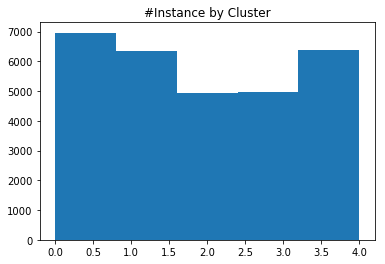

In [22]:
plt.hist(cluster_label, bins=n_cluster)
plt.title('#Instance by Cluster')

### 각 클러스터의 특징 추출

In [23]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import operator

C:\Users\HyoChang\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus as pydot

In [25]:
dt = DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes = n_cluster)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(accident_data.drop('REPORT_NO', axis=1),
                                                    cluster_label,test_size=0.3)

In [27]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=5,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [28]:
print('Training Accuracy', accuracy_score(y_train,dt.predict(X_train)))
print('Test Accuracy', accuracy_score(y_test,dt.predict(X_test)))

Training Accuracy 0.930050687907
Test Accuracy 0.930164451453


In [29]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=X_train.columns,\
               impurity=False, proportion=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_jpeg('tree.jpeg')
Image(filename='tree.jpeg')

InvocationException: GraphViz's executables not found

## 클러스터 레이블을 '사고의 유형'으로 정의

In [47]:
accident_type_lookup = pd.DataFrame()
accident_type_lookup['REPORT_NO'] = accident_data['REPORT_NO']
accident_type_lookup['ACCIDENT_TYPE'] = cluster_label

In [48]:
data = pd.merge(data, accident_type_lookup, how='left', on='REPORT_NO')

## 사고의 유형을 세분화

### 사고의 유형 별로, '과실 상황'을 유형화

#### 과실이 있는 운전자의, 사고 당시 주행 상황과 충돌 유형에 대한 변수

In [49]:
fault_vars = ['HIT_AND_RUN_FLAG', 'MOVEMENT_CODE', 'BODY_TYPE_CODE', 'COLLISION_TYPE_CODE']

In [50]:
fault_drivers = data.loc[data.FAULT_FLAG == 'Y'].reset_index(drop=True)
fault_drivers = fault_drivers[fault_vars + ['REPORT_NO', 'ACCIDENT_TYPE']]

report_no = fault_drivers.REPORT_NO
accident_type = fault_drivers.ACCIDENT_TYPE

fault_drivers = pd.get_dummies(fault_drivers.drop('REPORT_NO',axis=1).drop('ACCIDENT_TYPE',axis=1))
fault_drivers['REPORT_NO'] = report_no
fault_drivers['ACCIDENT_TYPE'] = accident_type

#### 과실로 인해 발생한 피해에 대한 변수

In [51]:
accident_result_vars = ['DAMAGE_CODE', 'INJ_SEVER_CODE']

In [52]:
accident_results = data[accident_result_vars + ['REPORT_NO']]

report_no = accident_results.REPORT_NO

accident_results = pd.get_dummies(accident_results.drop('REPORT_NO',axis=1))
accident_results['REPORT_NO'] = report_no

accident_results = accident_results.groupby('REPORT_NO').agg('sum').reset_index()

In [53]:
fault_results = pd.merge(fault_drivers, accident_results, on = 'REPORT_NO', how = 'left')

In [54]:
results_vars = [col for col in fault_results.columns 
          if ('DAMAGE_CODE' in col) or ('INJ_SEVER_CODE') in col]

### 과실 상황의 유형화를 위해 클러스터링 수행

In [55]:
type0 = fault_drivers.loc[fault_drivers.ACCIDENT_TYPE == 0].reset_index(drop=True)
type1 = fault_drivers.loc[fault_drivers.ACCIDENT_TYPE == 1].reset_index(drop=True)
type2 = fault_drivers.loc[fault_drivers.ACCIDENT_TYPE == 2].reset_index(drop=True)
type3 = fault_drivers.loc[fault_drivers.ACCIDENT_TYPE == 3].reset_index(drop=True)
type4 = fault_drivers.loc[fault_drivers.ACCIDENT_TYPE == 4].reset_index(drop=True)

In [56]:
types = [type0,type1,type2,type3,type4]

#### 각 사고 유형 별, 과실 유형의 개수를 4개로 가정

In [57]:
n_clusters_type_detail = 4

In [58]:
km0 = KMeans(n_clusters=n_clusters_type_detail)
km1 = KMeans(n_clusters=n_clusters_type_detail)
km2 = KMeans(n_clusters=n_clusters_type_detail)
km3 = KMeans(n_clusters=n_clusters_type_detail)
km4 = KMeans(n_clusters=n_clusters_type_detail)

In [59]:
kms = [km0,km1,km2,km3,km4]

In [60]:
dt0 = DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=n_clusters_type_detail)
dt1 = DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=n_clusters_type_detail)
dt2 = DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=n_clusters_type_detail)
dt3 = DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=n_clusters_type_detail)
dt4 = DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=n_clusters_type_detail)

In [61]:
dts = [dt0,dt1,dt2,dt3,dt4]

In [62]:
for i in range(0, n_cluster):
    
    print('Accident Type : ' + str(i))
    
    cluster_type_detail_label = kms[i].fit_predict(types[i].drop('ACCIDENT_TYPE',axis=1).\
                                                            drop('REPORT_NO',axis=1))   
    
    X_tr, X_te, y_tr, y_te = train_test_split(types[i].drop('ACCIDENT_TYPE',axis=1).\
                                                       drop('REPORT_NO',axis=1),
                                              cluster_type_detail_label,test_size = 0.2)
    dts[i].fit(X_tr, y_tr)

    types[i]['ACCIDENT_TYPE_DETAIL'] = cluster_type_detail_label

    print('Training Accuracy', accuracy_score(y_tr,dts[i].predict(X_tr)))
    print('Test Accuracy', accuracy_score(y_te,dts[i].predict(X_te)))

Accident Type : 0
Training Accuracy 0.988421694089
Test Accuracy 0.991473812424
Accident Type : 1
Training Accuracy 1.0
Test Accuracy 1.0
Accident Type : 2
Training Accuracy 0.991993594876
Test Accuracy 0.994663820704
Accident Type : 3
Training Accuracy 0.913319776309
Test Accuracy 0.904471544715
Accident Type : 4
Training Accuracy 0.914077990747
Test Accuracy 0.914134742404


### 대분류 0

In [63]:
dot_data = StringIO()
export_graphviz(dts[0], out_file=dot_data, feature_names=X_tr.columns,\
                impurity=False, proportion=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_jpeg('tree_type0.jpeg')
Image(filename='tree_type0.jpeg')

InvocationException: GraphViz's executables not found

### 대분류 1

In [39]:
dot_data = StringIO()
export_graphviz(dts[1], out_file=dot_data, feature_names=X_tr.columns,\
                impurity=False, proportion=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_jpeg('tree_type1.jpeg')
Image(filename='tree_type1.jpeg')

NameError: name 'X_tr' is not defined

### 대분류 2

In [40]:
dot_data = StringIO()
export_graphviz(dts[2], out_file=dot_data, feature_names=X_tr.columns,\
                impurity=False, proportion=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_jpeg('tree_type2.jpeg')
Image(filename='tree_type2.jpeg')

NameError: name 'X_tr' is not defined

### 대분류 3

In [41]:
dot_data = StringIO()
export_graphviz(dts[3], out_file=dot_data, feature_names=X_tr.columns,\
                impurity=False, proportion=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_jpeg('tree_type3.jpeg')
Image(filename='tree_type3.jpeg')

NameError: name 'X_tr' is not defined

### 대분류 4

In [42]:
dot_data = StringIO()
export_graphviz(dts[4], out_file=dot_data, feature_names=X_tr.columns,\
                impurity=False, proportion=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_jpeg('tree_type4.jpeg')
Image(filename='tree_type4.jpeg')

NameError: name 'X_tr' is not defined

### 과실 유형 별 피해 규모

In [43]:
final_data=type0.append(type1).append(type2).append(type3).append(type4).reset_index(drop=True)

NameError: name 'type0' is not defined

In [44]:
final_data = pd.merge(final_data, accident_results, on = 'REPORT_NO', how = 'left')

NameError: name 'final_data' is not defined

In [45]:
final_data.groupby(['ACCIDENT_TYPE','ACCIDENT_TYPE_DETAIL']).agg('mean')[results_vars]

NameError: name 'final_data' is not defined

In [46]:
final_data.to_csv('accident_types_and_fatality.csv',index=False)

NameError: name 'final_data' is not defined